### Importing Required Libraries

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle

### Getting Required Data

In [211]:
tourism = pd.read_csv('../data/singapore_tourism_data/Final/tourism.csv')
tourism['year_month'] = pd.to_datetime(tourism['year_month'])
tourism['no_of_visitors'] = pd.to_numeric(tourism['no_of_visitors'], errors='coerce').fillna(0).astype(int)
display(tourism.head())
print(tourism.info())

,Region/Country,year_month,no_of_visitors
0,Total International Visitor Arrivals By Inboun...,2025-01-01,1633471
1,Southeast Asia,2025-01-01,476545
2,Brunei Darussalam,2025-01-01,4535
3,Indonesia,2025-01-01,251768
4,Malaysia,2025-01-01,102323


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35030 entries, 0 to 35029
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region/Country  35030 non-null  object        
 1   year_month      35030 non-null  datetime64[ns]
 2   no_of_visitors  35030 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 821.1+ KB
None


In [161]:
wait_time = pd.read_csv('../data/uss_wait_times/cleaned_2024_wait_times.csv')
display(wait_time.head())

,park,wait_time,date,time
0,Universal Studios Singapore,7,2024-01-01,10:00:00
1,Universal Studios Singapore,7,2024-01-01,10:05:00
2,Universal Studios Singapore,7,2024-01-01,10:10:00
3,Universal Studios Singapore,7,2024-01-01,10:15:00
4,Universal Studios Singapore,7,2024-01-01,10:20:00


In [162]:
four_day_forecast = pd.read_csv('../data/Meteorological/datasets/final_data/4_day_weather_forecasts.csv')
display(four_day_forecast.head())

,record_date,forecast_timestamp,forecast_date,day,temp_low,temp_high,humidity_low,humidity_high,forecast_summary,forecast_text,wind_speed_low,wind_speed_high,wind_direction
0,2016-03-19,2016-03-20T00:00:00+08:00,20/03/2016,Sunday,24,35,50,90,Warm. Afternoon showers.,Showers,10,20,NNE
1,2016-03-19,2016-03-21T00:00:00+08:00,21/03/2016,Monday,24,34,55,95,Afternoon and evening thundery showers.,Thundery Showers,10,20,NNW
2,2016-03-19,2016-03-22T00:00:00+08:00,22/03/2016,Tuesday,24,33,60,95,Afternoon and evening thundery showers.,Thundery Showers,10,25,NW
3,2016-03-19,2016-03-23T00:00:00+08:00,23/03/2016,Wednesday,25,33,60,95,Afternoon thundery showers.,Thundery Showers,10,20,WNW
4,2016-03-20,2016-03-21T00:00:00+08:00,21/03/2016,Monday,25,34,55,95,Afternoon thundery showers.,Thundery Showers,10,20,N


In [163]:
weather = pd.read_csv('../data/Meteorological/datasets/final_data/final_augmented_weather_sentosa_data.csv')
weather['Rain'] = weather['Daily Rainfall Total (mm)'].apply(lambda x: 1 if x > 0 else 0)
display(weather.head())

,Date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Rain
0,1/1/2016,5.2,4.2,4.2,4.2,27.1,28.9,24.7,6.5,24.5,1
1,2/1/2016,27.6,12.6,20.0,21.2,25.9,27.5,22.7,7.2,45.4,1
2,3/1/2016,2.0,1.2,1.6,1.8,26.4,27.7,25.0,6.8,25.2,1
3,4/1/2016,16.2,10.4,10.4,16.0,27.4,31.4,25.6,7.2,33.1,1
4,5/1/2016,0.0,0.0,0.0,0.0,28.9,32.5,26.6,7.6,34.2,0


In [164]:
events = pd.read_csv('../data/Events/EventData/supplementary_event_data_2016_2025.csv')
display(events.head())

,Date,Is_Event,Concert_Event,Sports_Event,MICE_Event,Theatre_Event,Cultural_Event,Social_Event,Event_Description
0,1/1/2016,0,0,0,0,0,0,0,0
1,1/2/2016,0,0,0,0,0,0,0,0
2,1/3/2016,0,0,0,0,0,0,0,0
3,1/4/2016,0,0,0,0,0,0,0,0
4,1/5/2016,0,0,0,0,0,0,0,0


In [165]:
school_holidays = pd.read_csv('../data/Events/Holidays/datasets/daily_school_holidays_combined.csv')
display(school_holidays.head())

,year,date,holiday_flag,holiday_category
0,2019,1/1/2019,0,NaN
1,2019,2/1/2019,0,NaN
2,2019,3/1/2019,0,NaN
3,2019,4/1/2019,0,NaN
4,2019,5/1/2019,0,NaN


In [166]:
public_holidays = pd.read_csv('../data/Events/Holidays/datasets/final_merged_PH_2020_2025.csv')
display(public_holidays.head())

,date,day,holiday
0,2020-01-01,Wednesday,New Year's Day
1,2020-01-25,Saturday,Chinese New Year
2,2020-01-26,Sunday,Chinese New Year
3,2020-04-10,Friday,Good Friday
4,2020-05-01,Friday,Labour Day


In [231]:
ride_wait_times = pd.read_csv('../data/uss_ride_wait_times/all_ride_wait_times.csv')

# Convert 'Date/Time' to datetime
ride_wait_times['Date/Time'] = pd.to_datetime(ride_wait_times['Date/Time'], errors='coerce')

# Convert 'Wait Time' to integer, handling non-numeric values
ride_wait_times['Wait Time'] = pd.to_numeric(ride_wait_times['Wait Time'], errors='coerce').fillna(0).astype(int)

# Ensure 'Ride' is of type string
ride_wait_times['Ride'] = ride_wait_times['Ride'].astype(str)

# Display the first few rows and info of the DataFrame
display(ride_wait_times.head())

,Ride,Date/Time,Wait Time
0,"Lights, Camera, Action! Hosted by Steven Spiel...",2024-04-01 06:00:05,0
1,"Lights, Camera, Action! Hosted by Steven Spiel...",2024-04-01 06:05:05,0
2,"Lights, Camera, Action! Hosted by Steven Spiel...",2024-04-01 06:10:05,0
3,"Lights, Camera, Action! Hosted by Steven Spiel...",2024-04-01 06:15:05,0
4,"Lights, Camera, Action! Hosted by Steven Spiel...",2024-04-01 06:20:05,0


In [261]:
tourism_age = pd.read_csv('../data/singapore_tourism_data/Final/tourism_age_groups.csv')
tourism_age['year_month'] = pd.to_datetime(tourism_age['year_month'])
tourism_age['no_of_visitors'] = pd.to_numeric(tourism_age['no_of_visitors'], errors='coerce').fillna(0).astype(int)
display(tourism_age.head())

,age_group,year_month,no_of_visitors
0,Under 15 Years,2025-01-01,198338
1,15-19 Years,2025-01-01,74039
2,20-24 Years,2025-01-01,109166
3,25-34 Years,2025-01-01,308438
4,35-44 Years,2025-01-01,329530


### Exploratory Data Analysis

#### International Tourist Trends

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


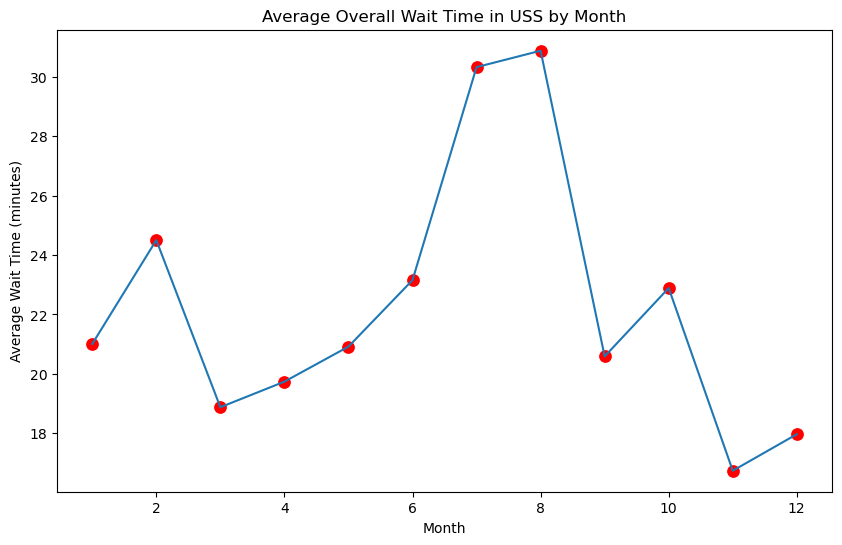

In [218]:
wait_time_month = wait_time
# Ensure that date is in datetime format
wait_time_month['date'] = pd.to_datetime(wait_time['date'])
wait_time_month['month'] = wait_time['date'].dt.month

# Group by month and calculate the average wait time
wait_time_month = wait_time_month.groupby('month')['wait_time'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=wait_time_month, x='month', y='wait_time', ax=ax)
sns.scatterplot(data=wait_time_month, x='month', y='wait_time', ax=ax, color='red', s=100)
ax.set_title('Average Overall Wait Time in USS by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Wait Time (minutes)')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


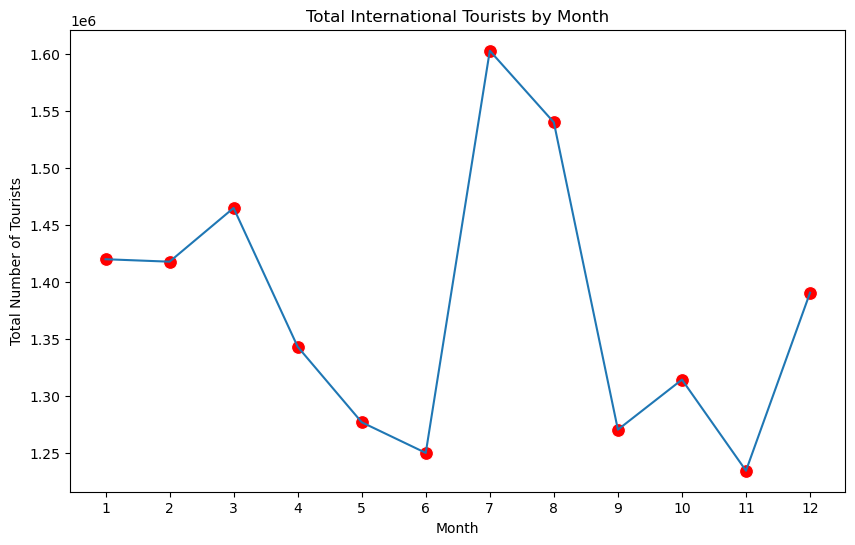

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for 'Total International Visitor Arrivals By Inbound Tourism Markets'
tourism_total_2024 = tourism[tourism['Region/Country'] == 'Total International Visitor Arrivals By Inbound Tourism Markets'].copy()

# Drop the 'DataSeries' column
tourism_total_2024 = tourism_total_2024.drop(columns=['Region/Country'])

# Filter for entries in the year 2024
tourism_total_2024 = tourism_total_2024[tourism_total_2024['year_month'].dt.year == 2024]

# Extract the month
tourism_total_2024['month'] = tourism_total_2024['year_month'].dt.month
tourism_total_2024 = tourism_total_2024.drop(columns=['year_month'])
tourism_total_2024 = tourism_total_2024.sort_values(by='month')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=tourism_total_2024, x='month', y = "no_of_visitors", ax=ax)
sns.scatterplot(data=tourism_total_2024, x='month', y = "no_of_visitors", ax=ax, color='red', s=100)
ax.set_title('Total International Tourists by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Total Number of Tourists')
ax.set_xticks(range(1, 13))  # Ensure all months are shown on the x-axis
plt.show()

We can see that there are general increases during February, August, October and a slight increase in December. The largest increases are in February and August. There is also a dip in November and subsequent increase in December. This trend applies for both average wait times in Universal Studios Singapore, and also for the number of tourists coming into Singapore in the year 2024. Hence, from this we can observe and understand that the general trends of the Universal Studios wait times is similar to the tourist numbers in 2024, since a proportion of the Universal Studios visitors would also be international tourists in Singapore. Thus, when there is an influx of tourists, there will likely also be an increase in visitors to Universal Studios, as Universal Studios is considered as a tourist attraction in Singapore. According to TripAdvisor, Universal Studios is the #1 out of 29 things to do in Singapore. (https://www.tripadvisor.com.sg/Attraction_Review-g294264-d2439664-Reviews-Universal_Studios_Singapore-Sentosa_Island.html)

In addition, we can see that there is an influx of tourists in the year 2024 from January to February, as well as June to August. The influx of tourists in June to August correlates with the summer holidays overseas. In February, this could be due to the influx of Chinese tourists during the Chinese New Year holidays, which also coincides with their school winter break.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

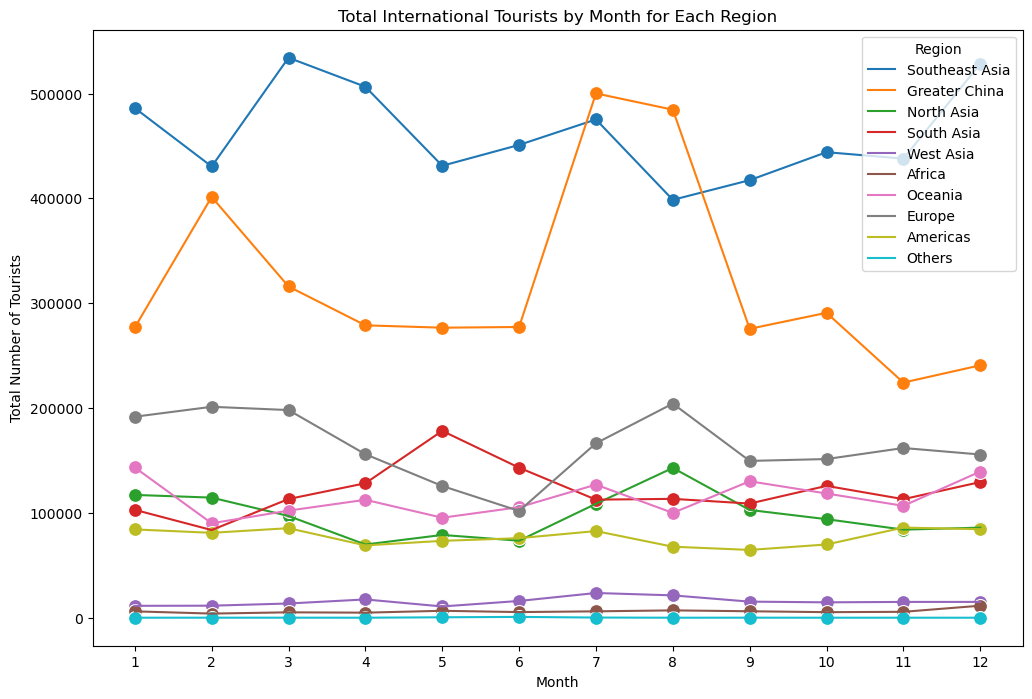

In [219]:
# Filter for entries in the year 2024
tourism_total_2024_reg = tourism[tourism['year_month'].dt.year == 2024].copy()

# Define the regions
regions = ['Southeast Asia', 'Greater China', 'North Asia', 'South Asia', 'West Asia', 'Africa', 'Oceania', 'Europe', 'Americas', 'Others']

# Extract the month
tourism_total_2024_reg['month'] = tourism_total_2024_reg['year_month'].dt.month

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

for region in regions:
    region_data = tourism_total_2024_reg[tourism_total_2024_reg['Region/Country'] == region]
    if not region_data.empty:
        monthly_visitors = region_data.groupby('month')['no_of_visitors'].sum().reset_index()
        sns.lineplot(data=monthly_visitors, x='month', y='no_of_visitors', ax=ax, label=region)
        sns.scatterplot(data=monthly_visitors, x='month', y='no_of_visitors', ax=ax, s=100)

ax.set_title('Total International Tourists by Month for Each Region')
ax.set_xlabel('Month')
ax.set_ylabel('Total Number of Tourists')
ax.set_xticks(range(1, 13))  # Ensure all months are shown on the x-axis
ax.legend(title='Region')
plt.show()

As expected, we can see that the influx of tourists in February is likely due to the increase in tourists from China, where there is a significant spike in the number of tourists from Greater China in February. In addition, we can also see a spike in the number of tourists from Europe in the months of June to August, though not as significant as the spike in the number of tourists from Greater China. Once again, this sharp increased can be explained by the Chinese school summer holidays, which fall on January and August.

According to the Singapore Tourism Board (STB), "Mainland China, Indonesia, and Australia emerged as the top tourism receipts generating markets, contributing $3.58 billion, $2.13 billion, and $1.44 billion respectively". In addition, "Top markets for visitor arrivals were Mainland China (3.08 million), Indonesia (2.49 million) and India (1.20 million)". (https://www.stb.gov.sg/about-stb/media-publications/media-centre/singapore-achieves-historical-high-in-tourism-receipts-in-2024) Because Chinese tourists account for not only the largest spenders but also the largest proportion of international visitors to enter Singapore, we can zoom our analysis into the months in which there is a significant spike in the number of international tourists from Greater China and analyse their behaviour. Thus, we will look into the average wait times for individual rides throughout the day for February and July.

['TRANSFORMERS The Ride: The Ultimate 3D Battle',
 'Treasure Hunters',
 'Canopy Flyer',
 'Jurassic Park Rapids Adventure',
 'Puss In Boots’ Giant Journey']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

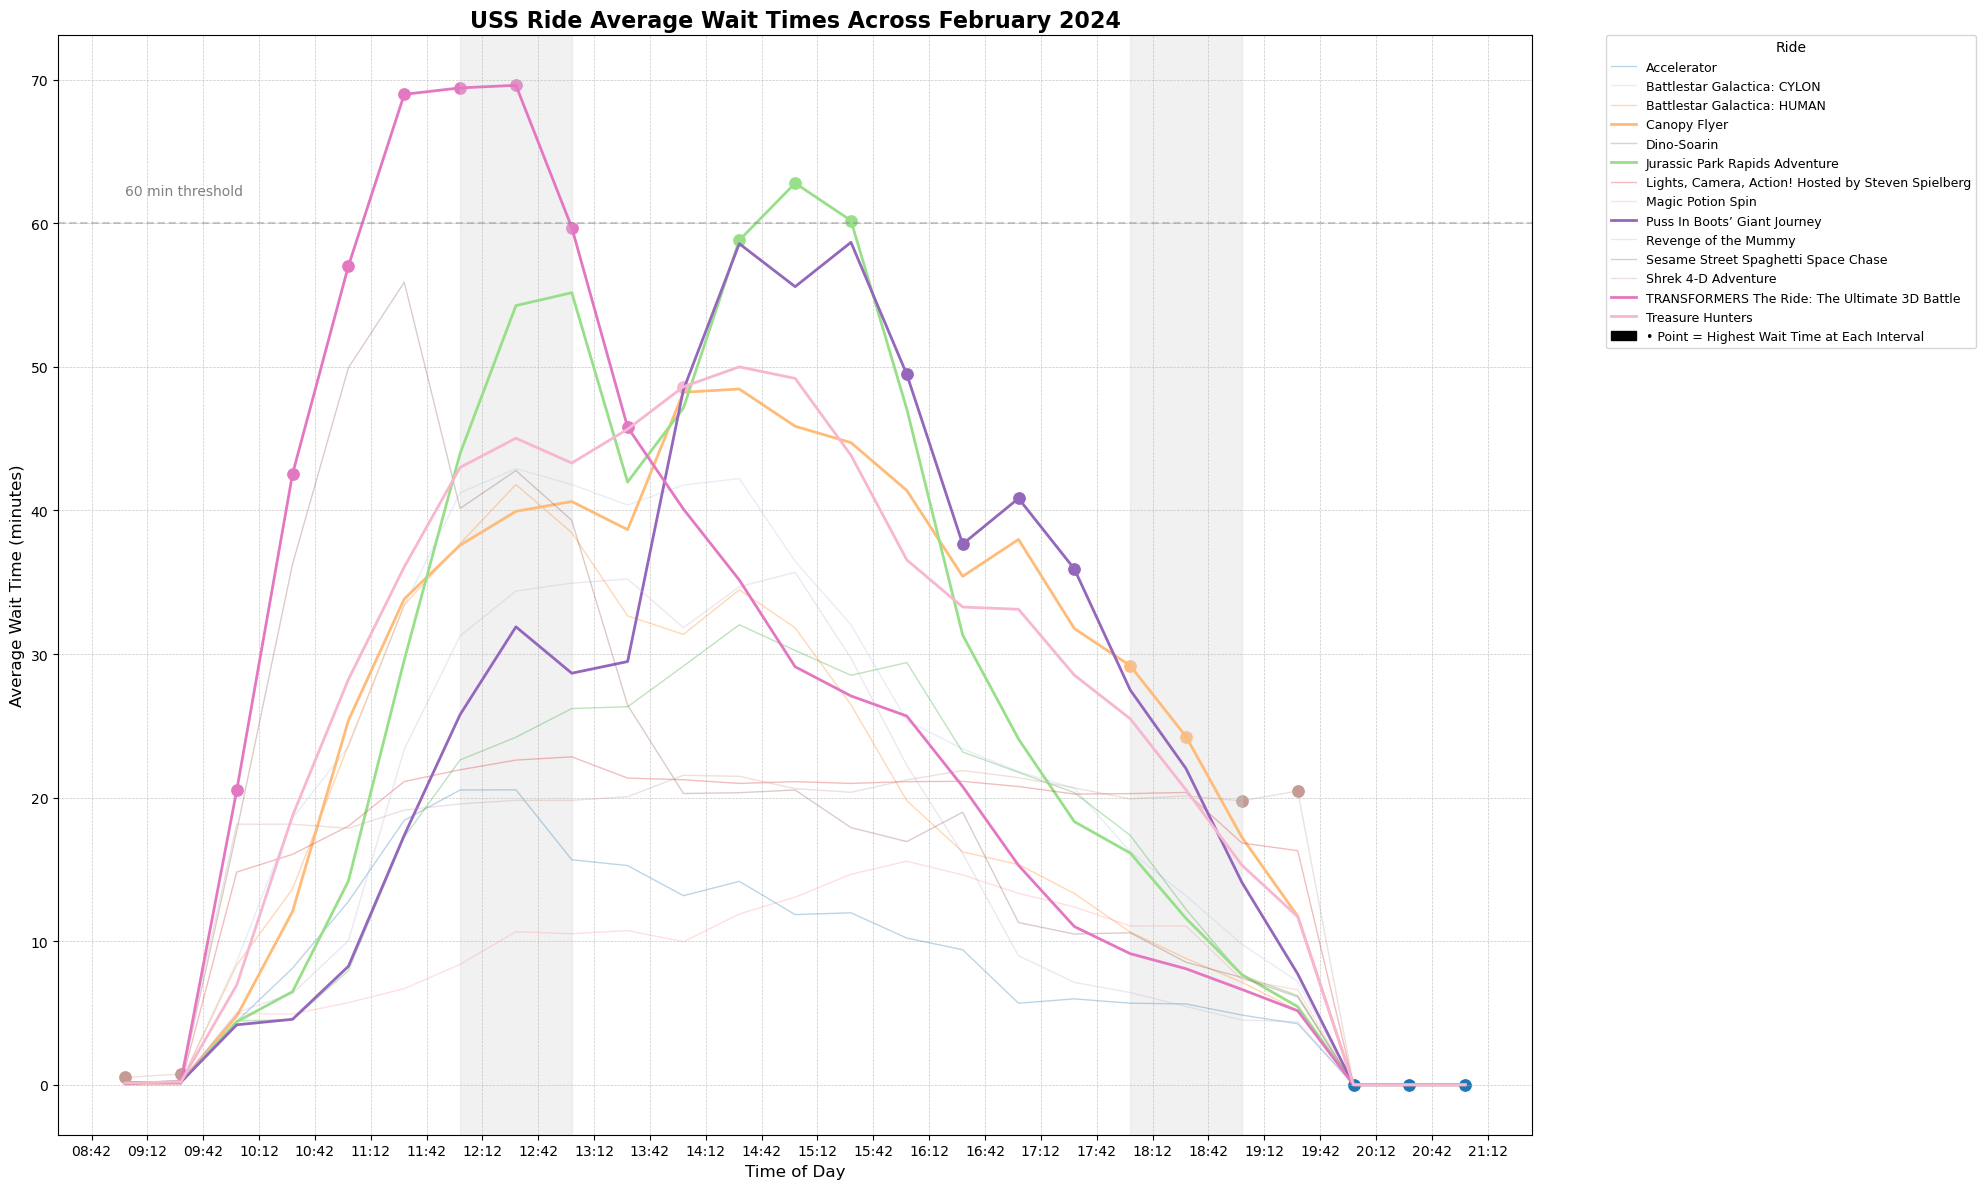

In [257]:
# get feb 2024 data
ride_wait_times_feb = ride_wait_times[
    (ride_wait_times['Date/Time'].dt.month == 2) &
    (ride_wait_times['Date/Time'].dt.year == 2024)
].copy()

# change interval to 30mins, and extract time
ride_wait_times_feb['Date/Time'] = pd.to_datetime(ride_wait_times_feb['Date/Time'])
ride_wait_times_feb['Time'] = ride_wait_times_feb['Date/Time'].dt.floor('30T').dt.time

# group data
avg_feb_waits = ride_wait_times_feb.groupby(['Ride', 'Time'])['Wait Time'].mean().reset_index()

# dummy date for plotting
avg_feb_waits['Date/Time'] = pd.to_datetime('2024-02-01 ' + avg_feb_waits['Time'].astype(str))

resampled_data = avg_feb_waits.copy()

# opening hours for USS
resampled_data = avg_feb_waits.copy()
resampled_data['Date/Time'] = pd.to_datetime('2024-02-01 ' + resampled_data['Time'].astype(str))
resampled_data = resampled_data[
    (resampled_data['Date/Time'].dt.time >= pd.to_datetime('09:00').time()) &
    (resampled_data['Date/Time'].dt.time <= pd.to_datetime('21:00').time())
]

# max wait times for each 30 min interval
max_wait_times = resampled_data.loc[resampled_data.groupby('Date/Time')['Wait Time'].idxmax()]

# top 5 rides of the month
avg_wait_by_ride = resampled_data.groupby('Ride')['Wait Time'].mean().sort_values(ascending=False)
top_rides = avg_wait_by_ride.head(5).index.tolist()
display(top_rides)

# setup plot
plt.figure(figsize=(20,12))
palette = sns.color_palette("tab20", len(resampled_data['Ride'].unique()))
ax = plt.gca()

# plot each ride's line with fading for non-top rides
for ride in resampled_data['Ride'].unique():
    ride_data = resampled_data[resampled_data['Ride'] == ride]
    sns.lineplot(
        data=ride_data,
        x='Date/Time',
        y='Wait Time',
        label=ride,
        color=palette[list(resampled_data['Ride'].unique()).index(ride)],
        linewidth=2 if ride in top_rides else 1,
        alpha=1.0 if ride in top_rides else 0.3
    )

# scatter plot for highest wait times at each interval
for ride in resampled_data['Ride'].unique():
    ride_data = max_wait_times[max_wait_times['Ride'] == ride]
    sns.scatterplot(
        data=ride_data,
        x='Date/Time',
        y='Wait Time',
        color=palette[list(resampled_data['Ride'].unique()).index(ride)],
        s=100,
        legend=False
    )

# shade lunchtime and dinner time
for start, end in [('12:00', '13:00'), ('18:00', '19:00')]:
    ax.axvspan(pd.to_datetime(f"2024-02-01 {start}"), pd.to_datetime(f"2024-02-01 {end}"),
               color='lightgray', alpha=0.3)

# format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# titles and labels
plt.title('USS Ride Average Wait Times Across February 2024', fontsize=16, weight='bold')
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Average Wait Time (minutes)', fontsize=12)

# 60 min threshold line
plt.axhline(y=60, linestyle='--', color='gray', alpha=0.4)
plt.text(resampled_data['Date/Time'].min(), 62, '60 min threshold', color='gray', fontsize=10)

# custom legend for scatter points
highlight_legend = mpatches.Patch(color='black', label='• Point = Highest Wait Time at Each Interval')
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles=handles + [highlight_legend],
    title='Ride',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()


['Battlestar Galactica: HUMAN',
 'Battlestar Galactica: CYLON',
 'TRANSFORMERS The Ride: The Ultimate 3D Battle',
 'Jurassic Park Rapids Adventure',
 'Treasure Hunters']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

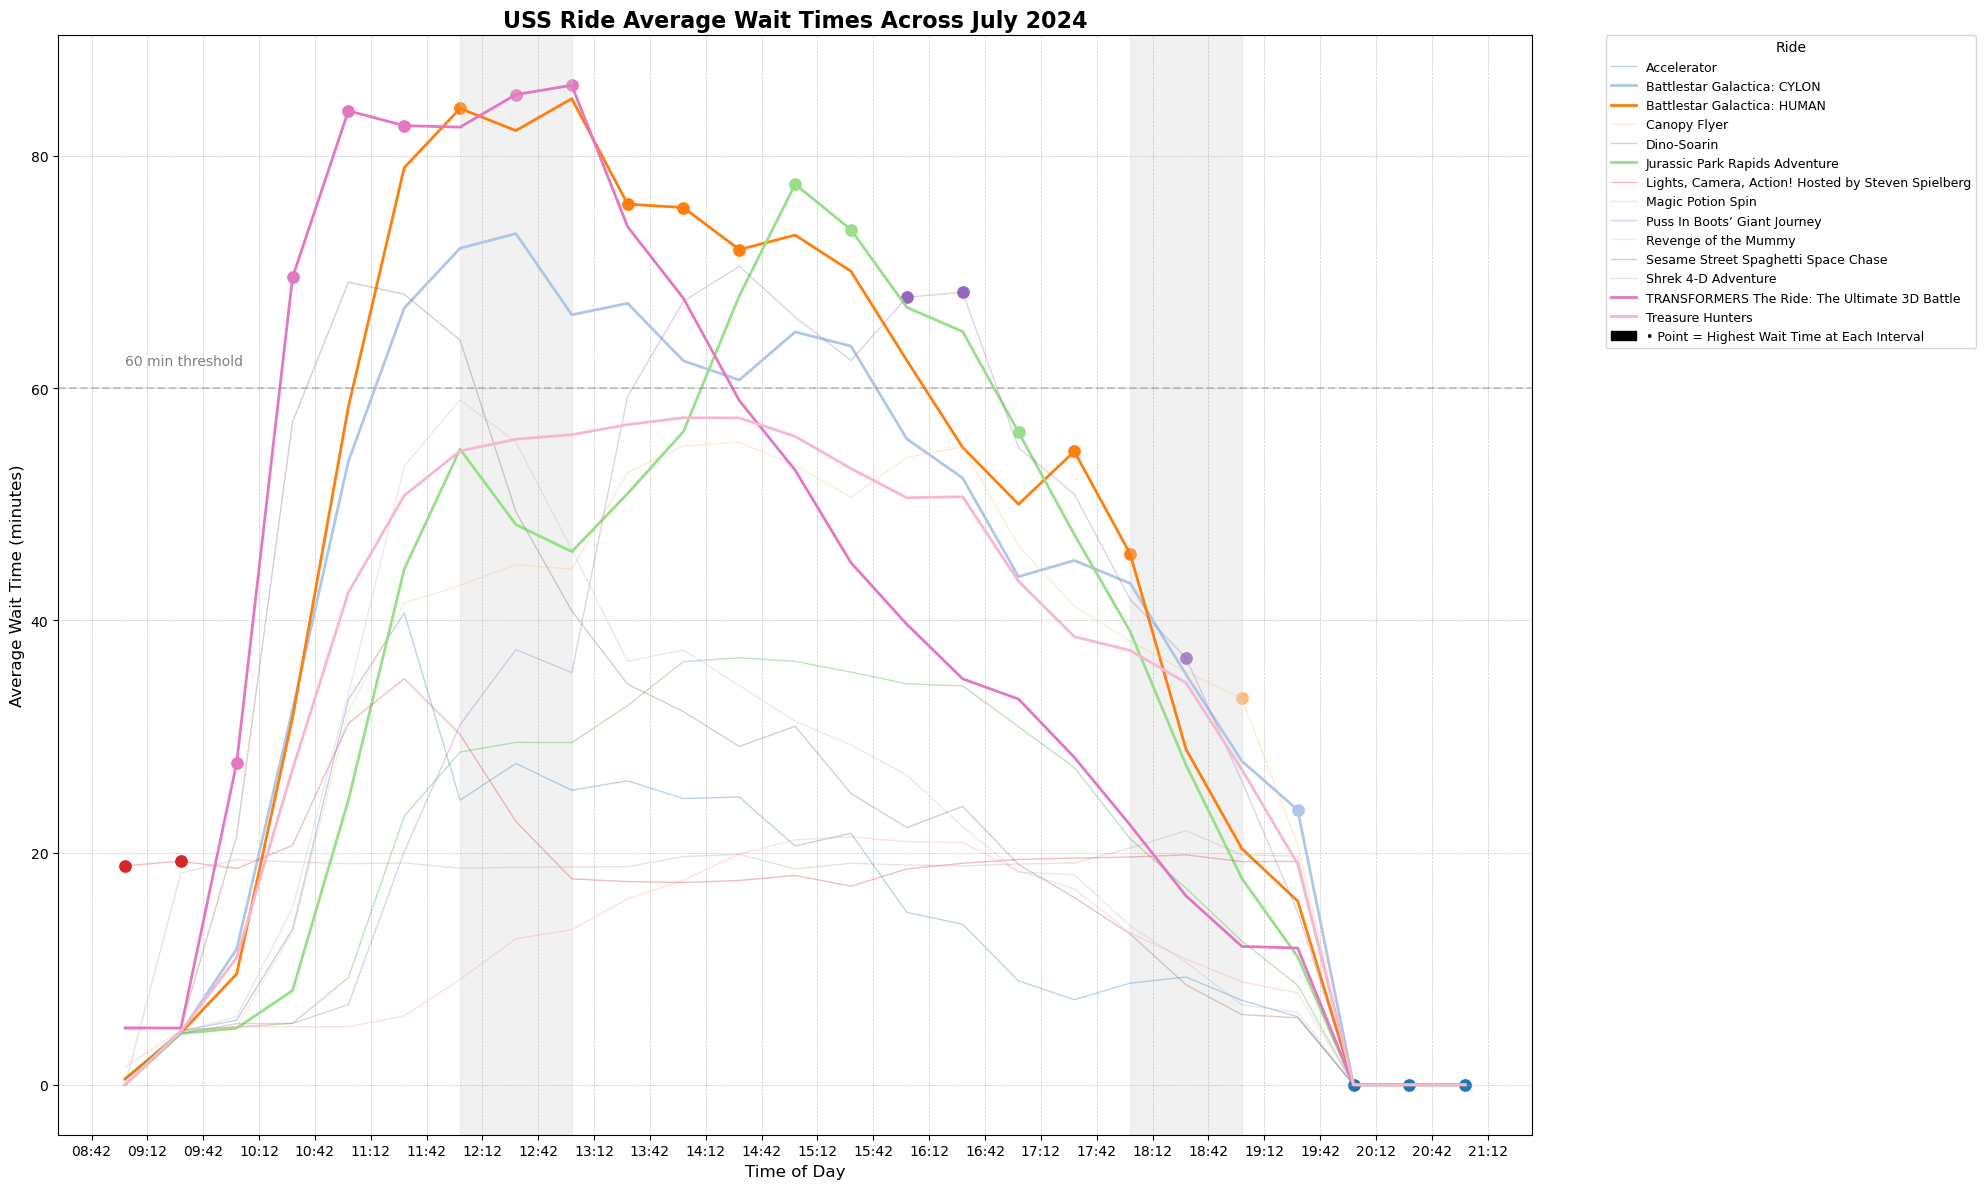

In [259]:
# get feb 2024 data
ride_wait_times_jul = ride_wait_times[
    (ride_wait_times['Date/Time'].dt.month == 7) &
    (ride_wait_times['Date/Time'].dt.year == 2024)
].copy()

# change interval to 30mins, and extract time
ride_wait_times_jul['Date/Time'] = pd.to_datetime(ride_wait_times_jul['Date/Time'])
ride_wait_times_jul['Time'] = ride_wait_times_jul['Date/Time'].dt.floor('30T').dt.time

# group data
avg_jul_waits = ride_wait_times_jul.groupby(['Ride', 'Time'])['Wait Time'].mean().reset_index()

# dummy date for plotting
avg_jul_waits['Date/Time'] = pd.to_datetime('2024-07-01 ' + avg_jul_waits['Time'].astype(str))

resampled_data = avg_jul_waits.copy()

# opening hours for USS
resampled_data = avg_jul_waits.copy()
resampled_data['Date/Time'] = pd.to_datetime('2024-07-01 ' + resampled_data['Time'].astype(str))
resampled_data = resampled_data[
    (resampled_data['Date/Time'].dt.time >= pd.to_datetime('09:00').time()) &
    (resampled_data['Date/Time'].dt.time <= pd.to_datetime('21:00').time())
]

# max wait times for each 30 min interval
max_wait_times = resampled_data.loc[resampled_data.groupby('Date/Time')['Wait Time'].idxmax()]

# top 5 rides of the month
avg_wait_by_ride = resampled_data.groupby('Ride')['Wait Time'].mean().sort_values(ascending=False)
top_rides = avg_wait_by_ride.head(5).index.tolist()
display(top_rides)

# setup plot
plt.figure(figsize=(20,12))
palette = sns.color_palette("tab20", len(resampled_data['Ride'].unique()))
ax = plt.gca()

# plot each ride's line with fading for non-top rides
for ride in resampled_data['Ride'].unique():
    ride_data = resampled_data[resampled_data['Ride'] == ride]
    sns.lineplot(
        data=ride_data,
        x='Date/Time',
        y='Wait Time',
        label=ride,
        color=palette[list(resampled_data['Ride'].unique()).index(ride)],
        linewidth=2 if ride in top_rides else 1,
        alpha=1.0 if ride in top_rides else 0.3
    )

# scatter plot for highest wait times at each interval
for ride in resampled_data['Ride'].unique():
    ride_data = max_wait_times[max_wait_times['Ride'] == ride]
    sns.scatterplot(
        data=ride_data,
        x='Date/Time',
        y='Wait Time',
        color=palette[list(resampled_data['Ride'].unique()).index(ride)],
        s=100,
        legend=False
    )

# shade lunchtime and dinner time
for start, end in [('12:00', '13:00'), ('18:00', '19:00')]:
    ax.axvspan(pd.to_datetime(f"2024-07-01 {start}"), pd.to_datetime(f"2024-07-01 {end}"),
               color='lightgray', alpha=0.3)

# format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# titles and labels
plt.title('USS Ride Average Wait Times Across July 2024', fontsize=16, weight='bold')
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Average Wait Time (minutes)', fontsize=12)

# 60 min threshold line
plt.axhline(y=60, linestyle='--', color='gray', alpha=0.4)
plt.text(resampled_data['Date/Time'].min(), 62, '60 min threshold', color='gray', fontsize=10)

# custom legend for scatter points
highlight_legend = mpatches.Patch(color='black', label='• Point = Highest Wait Time at Each Interval')
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles=handles + [highlight_legend],
    title='Ride',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()

From this, we can see the lower intensity rides tend to be more popular, such as the Transformers ride, and Puss in Boots' Giant Journey in February. However, in the month of July, high intensity rides such as Battlestar Galactica tend to be more popular.

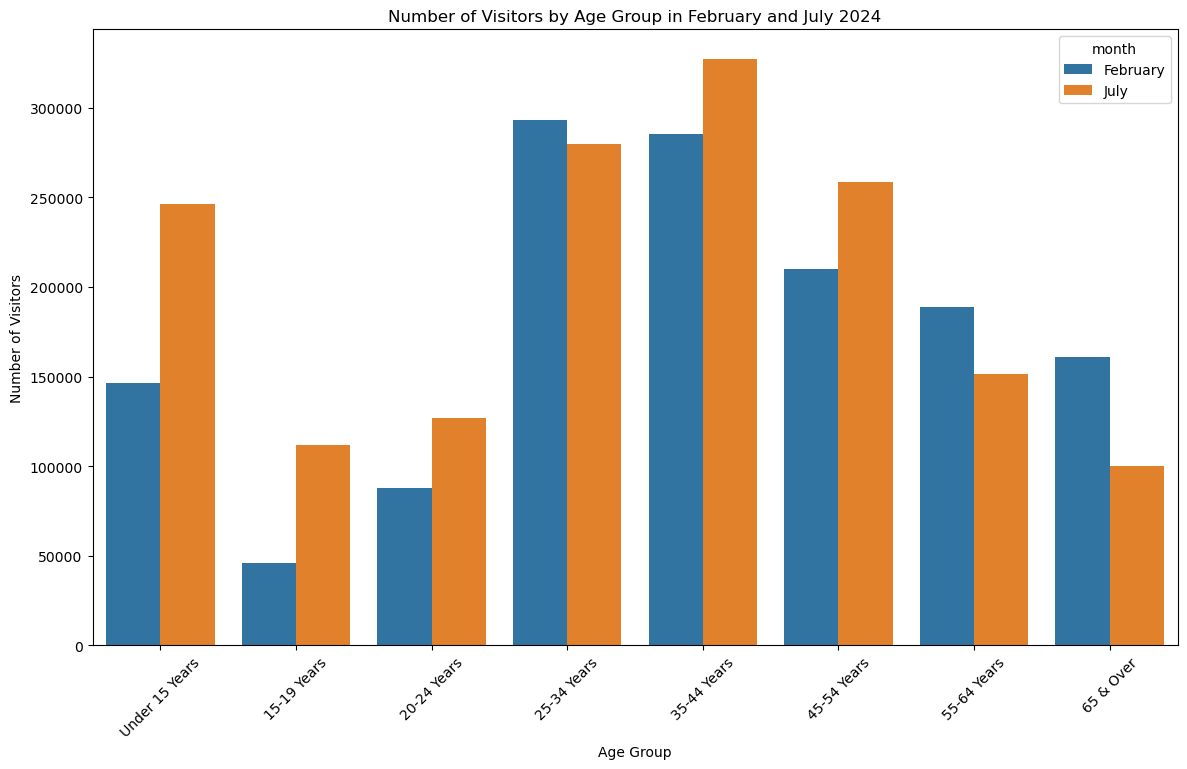

In [ ]:
# filter the data for February and July 2024
age_groups_feb_jul_2024 = tourism_age[
    (tourism_age['year_month'].dt.year == 2024) &
    (tourism_age['year_month'].dt.month.isin([2, 7]))
].copy()

# extract the month for plotting
age_groups_feb_jul_2024['month'] = age_groups_feb_jul_2024['year_month'].dt.month

# Ccnvert month number to month name
age_groups_feb_jul_2024['month'] = age_groups_feb_jul_2024['year_month'].dt.month.map({2: 'February', 7: 'July'})

# group by age group and month, and sum the number of visitors
grouped_data = age_groups_feb_jul_2024.groupby(['age_group', 'month'])['no_of_visitors'].sum().reset_index()
age_order = [
    'Under 15 Years',
    '15-19 Years',
    '20-24 Years',
    '25-34 Years',
    '35-44 Years',
    '45-54 Years',
    '55-64 Years',
    '65 & Over'
]

# plotting with custom order
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='age_group', y='no_of_visitors', hue='month', order=age_order)
plt.title('Number of Visitors by Age Group in February and July 2024')
plt.xlabel('Age Group')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)
plt.show()

#### Weather Patterns vs. Wait Times

Create a table with statistical summaries for each day's wait times in Universal Studios Singapore.

In [169]:
# Ensure that date is in datetime format
wait_time_details = wait_time.copy()
wait_time_details['date'] = pd.to_datetime(wait_time_details['date'])

# Filter the DataFrame to include only the date and wait_time columns
wait_time_details = wait_time_details.filter(['date', 'wait_time'])

# Group by date and calculate the average, maximum, and minimum wait times
wait_time_details = wait_time_details.groupby('date').agg(
    avg_wait=('wait_time', 'mean'),
    max_wait=('wait_time', 'max'),
    min_wait=('wait_time', 'min')
).reset_index()

# Display the summary DataFrame
display(wait_time_details.head())

,date,avg_wait,max_wait,min_wait
0,2024-01-01,16.755906,25,7
1,2024-01-02,20.443396,30,7
2,2024-01-03,17.870370,26,8
3,2024-01-04,11.638889,16,7
4,2024-01-05,17.268519,24,7


In [170]:
# Ensure that date is in datetime format
weather['Date'] = pd.to_datetime(weather['Date'], format = '%d/%m/%Y')

# Filter for entries in the year 2024
weather_2024 = weather[weather['Date'].dt.year == 2024].copy().reset_index()
weather_2024 = weather_2024.drop(columns=['index'])

weather_2024 = weather_2024.filter(['Date', 'Daily Rainfall Total (mm)', 'Maximum Temperature (°C)', 'Minimum Temperature (°C)', 'Rain'])

# Display the filtered DataFrame
display(weather_2024.head())

,Date,Daily Rainfall Total (mm),Maximum Temperature (°C),Minimum Temperature (°C),Rain
0,2024-01-01,0.0,29.2,25.2,0
1,2024-01-02,5.6,29.3,22.6,1
2,2024-01-03,0.4,31.8,25.1,1
3,2024-01-04,10.0,29.2,25.9,1
4,2024-01-05,7.2,31.7,28.0,1


In [171]:
merge_weather_wait_time = pd.merge(wait_time_details, weather_2024, left_on='date', right_on='Date', how='inner')
merge_weather_wait_time = merge_weather_wait_time.drop(columns=['Date'])

def categorize_weather(row):
    if row['Daily Rainfall Total (mm)'] > 5:
        return 'Rainy'
    elif row['Maximum Temperature (°C)'] > 32:
        return 'Hot'
    else:
        return 'Mild'

merge_weather_wait_time['weather_category'] = merge_weather_wait_time.apply(categorize_weather, axis=1)

display(merge_weather_wait_time.head())

,date,avg_wait,max_wait,min_wait,Daily Rainfall Total (mm),Maximum Temperature (°C),Minimum Temperature (°C),Rain,weather_category
0,2024-01-01,16.755906,25,7,0.0,29.2,25.2,0,Mild
1,2024-01-02,20.443396,30,7,5.6,29.3,22.6,1,Rainy
2,2024-01-03,17.870370,26,8,0.4,31.8,25.1,1,Mild
3,2024-01-04,11.638889,16,7,10.0,29.2,25.9,1,Rainy
4,2024-01-05,17.268519,24,7,7.2,31.7,28.0,1,Rainy


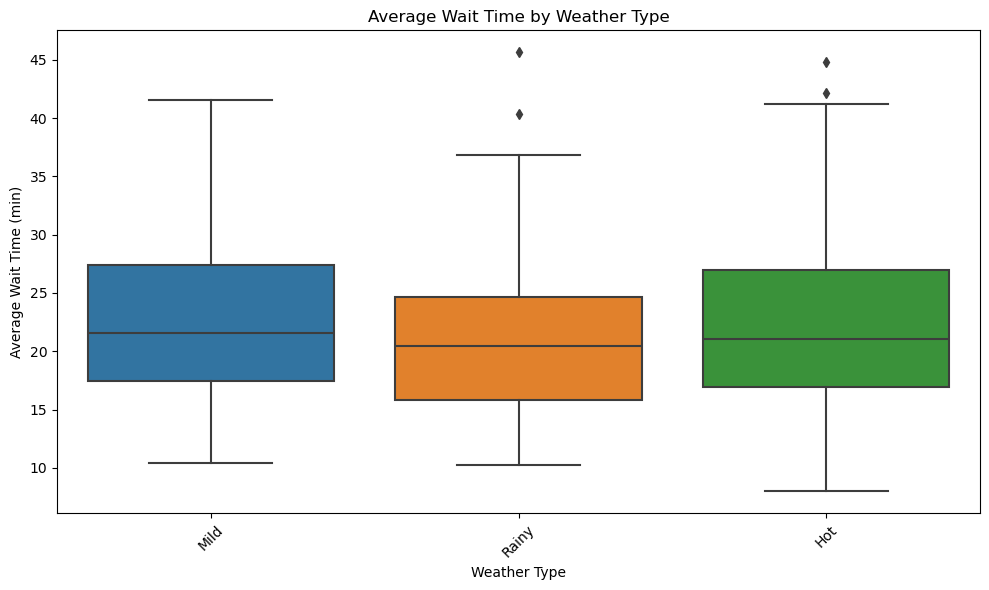

In [172]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merge_weather_wait_time, x='weather_category', y='avg_wait')
plt.title('Average Wait Time by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Average Wait Time (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Weather Forecast vs. Wait Times

In [173]:
# Ensure forecast_date and record_date are in datetime format
four_day_forecast['forecast_date'] = pd.to_datetime(four_day_forecast['forecast_date'])
four_day_forecast['record_date'] = pd.to_datetime(four_day_forecast['record_date'])

# Filter for forecast_date in the year 2024
forecast_2024 = four_day_forecast[four_day_forecast['forecast_date'].dt.year == 2024]

# Calculate the number of days prior the forecast was made
forecast_2024['days_prior'] = (forecast_2024['forecast_date'] - forecast_2024['record_date']).dt.days

# Group by the number of days prior
grouped_forecast = forecast_2024.groupby('days_prior')

# Split the dataset by the number of days prior
split_datasets = {days_prior: group for days_prior, group in grouped_forecast}

# Save each split dataset as a variable
for days_prior, df in split_datasets.items():
    vars()[f'forecast_{days_prior}_days_prior'] = df
    print(f"DataFrame for {days_prior} days prior created.")
    display(df.head())

DataFrame for 1 days prior created.


/var/folders/lh/7rc342j54xnd2xl5w63b9dy00000gn/T/ipykernel_2226/3674501516.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  four_day_forecast['forecast_date'] = pd.to_datetime(four_day_forecast['forecast_date'])
/var/folders/lh/7rc342j54xnd2xl5w63b9dy00000gn/T/ipykernel_2226/3674501516.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_2024['days_prior'] = (forecast_2024['forecast_date'] - forecast_2024['record_date']).dt.days


,record_date,forecast_timestamp,forecast_date,day,temp_low,temp_high,humidity_low,humidity_high,forecast_summary,forecast_text,wind_speed_low,wind_speed_high,wind_direction,days_prior
10884,2023-12-31,2024-01-01T00:00:00+08:00,2024-01-01,Monday,24,32,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,1
10888,2024-01-01,2024-01-02T00:00:00+08:00,2024-01-02,Tuesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,1
10892,2024-01-02,2024-01-03T00:00:00+08:00,2024-01-03,Wednesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,15,25,N,1
10896,2024-01-09,2024-01-10T00:00:00+08:00,2024-01-10,Wednesday,23,32,65,95,Afternoon thundery showers,Thundery Showers,15,25,NE,1
10900,2024-01-10,2024-01-11T00:00:00+08:00,2024-01-11,Thursday,23,32,65,95,Afternoon thundery showers,Thundery Showers,10,25,NE,1


DataFrame for 2 days prior created.


,record_date,forecast_timestamp,forecast_date,day,temp_low,temp_high,humidity_low,humidity_high,forecast_summary,forecast_text,wind_speed_low,wind_speed_high,wind_direction,days_prior
10881,2023-12-30,2024-01-01T00:00:00+08:00,2024-01-01,Monday,23,33,65,95,Afternoon thundery showers,Thundery Showers,10,25,NE,2
10885,2023-12-31,2024-01-02T00:00:00+08:00,2024-01-02,Tuesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,2
10889,2024-01-01,2024-01-03T00:00:00+08:00,2024-01-03,Wednesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,25,N,2
10893,2024-01-02,2024-01-04T00:00:00+08:00,2024-01-04,Thursday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,N,2
10897,2024-01-09,2024-01-11T00:00:00+08:00,2024-01-11,Thursday,23,32,65,95,Afternoon thundery showers,Thundery Showers,10,25,NNE,2


DataFrame for 3 days prior created.


,record_date,forecast_timestamp,forecast_date,day,temp_low,temp_high,humidity_low,humidity_high,forecast_summary,forecast_text,wind_speed_low,wind_speed_high,wind_direction,days_prior
10878,2023-12-29,2024-01-01T00:00:00+08:00,2024-01-01,Monday,24,33,65,95,Afternoon thundery showers.,Thundery Showers,10,25,NE,3
10882,2023-12-30,2024-01-02T00:00:00+08:00,2024-01-02,Tuesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,3
10886,2023-12-31,2024-01-03T00:00:00+08:00,2024-01-03,Wednesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,25,NNE,3
10890,2024-01-01,2024-01-04T00:00:00+08:00,2024-01-04,Thursday,22,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,3
10894,2024-01-02,2024-01-05T00:00:00+08:00,2024-01-05,Friday,23,32,70,95,Afternoon and evening thundery showers,Thundery Showers,10,20,NE,3


DataFrame for 4 days prior created.


,record_date,forecast_timestamp,forecast_date,day,temp_low,temp_high,humidity_low,humidity_high,forecast_summary,forecast_text,wind_speed_low,wind_speed_high,wind_direction,days_prior
10875,2023-12-28,2024-01-01T00:00:00+08:00,2024-01-01,Monday,24,33,60,95,Afternoon thundery showers.,Thundery Showers,10,20,NE,4
10879,2023-12-29,2024-01-02T00:00:00+08:00,2024-01-02,Tuesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,4
10883,2023-12-30,2024-01-03T00:00:00+08:00,2024-01-03,Wednesday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,20,NNE,4
10887,2023-12-31,2024-01-04T00:00:00+08:00,2024-01-04,Thursday,24,33,65,95,Afternoon thundery showers,Thundery Showers,10,25,NNE,4
10891,2024-01-01,2024-01-05T00:00:00+08:00,2024-01-05,Friday,24,33,65,95,Afternoon thundery showers,Thundery Showers,5,15,NE,4
